<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Variables Categóricas Ordinales </font> </center>

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('temps.txt',sep='\s+',header=None) # Fuente: http://astro.iam.udg.mx/Estacion/NOAAPRMO.TXT
                                                         #         http://astro.iam.udg.mx/Estacion/NOAAMO.TXT
data.columns=['Temperatura máxima','Temperatura mínima','HDD','CDD','Rain']
d=['Sábado','Domingo','Lunes','Martes','Miércoles','Jueves','Viernes']
dias=[d[i%7] for i in range(len(data))]
catego=['Soleado','Mayormente soleado','Parcialmente nublado','Mayormente nublado','Nublado','Lluvioso']
prono=[catego[-1] if data['Rain'][i]>0 else catego[int(round(1.2*(data['HDD'][i]-data['CDD'][i])+2))] for i in range(len(data))]
df=pd.DataFrame(columns=['Días','Pronóstico','Temperatura máxima','Temperatura mínima'],index=range(len(data)))
df.iloc[:,2:4]=data.iloc[:,0:2]
df['Días']=dias
df['Pronóstico']=prono
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima
0,Sábado,Parcialmente nublado,28.2,11.2
1,Domingo,Parcialmente nublado,29.1,10.7
2,Lunes,Mayormente nublado,26.1,10.4
3,Martes,Mayormente soleado,29.4,11.1
4,Miércoles,Mayormente soleado,29.8,11.1


# Codificación lineal

- Encontrar $X =\{x_1,..,x_n\}$ donde $n$ el número de categorías

In [2]:
df['Días'].nunique()

7

In [3]:
#@title Codificación para la variable `Días`
n=len(df['Días'].unique())
lim=n-1 if n%2==0 else (n-1)//2
step = 2 if n%2==0 else 1
x=range(-lim,lim+1,step)
list(x)

[-3, -2, -1, 0, 1, 2, 3]

In [4]:
catego=df['Días'].unique()
catego

array(['Sábado', 'Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves',
       'Viernes'], dtype=object)

In [5]:
Días_ord=np.concatenate([catego[2:],catego[:2]])
Días_ord

array(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado',
       'Domingo'], dtype=object)

In [6]:
a0=0
a1=5 #-0.1
Días_lin={categorías:a1*i+a0 for categorías,i in zip(Días_ord,x)}
Días_lin

{'Lunes': -15,
 'Martes': -10,
 'Miércoles': -5,
 'Jueves': 0,
 'Viernes': 5,
 'Sábado': 10,
 'Domingo': 15}

In [7]:
df['Días_lin']=df['Días'].map(Días_lin)
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_lin
0,Sábado,Parcialmente nublado,28.2,11.2,10
1,Domingo,Parcialmente nublado,29.1,10.7,15
2,Lunes,Mayormente nublado,26.1,10.4,-15
3,Martes,Mayormente soleado,29.4,11.1,-10
4,Miércoles,Mayormente soleado,29.8,11.1,-5


In [8]:
df['Pronóstico'].nunique()

6

In [9]:
#@title Codificando la variable `Pronóstico`
n=len(df['Pronóstico'].unique())
lim=n-1 if n%2==0 else (n-1)//2
step=2 if n%2==0 else 1
x=range(-lim,lim+1,step)
list(x)

[-5, -3, -1, 1, 3, 5]

In [10]:
cat=df['Pronóstico'].unique()
cat

array(['Parcialmente nublado', 'Mayormente nublado', 'Mayormente soleado',
       'Soleado', 'Lluvioso', 'Nublado'], dtype=object)

In [11]:
Pronóstico_ord=np.concatenate([cat[-3:-5:-1],
                               np.array([cat[0],cat[-1],cat[1],cat[-2]])
                               ])
Pronóstico_ord

array(['Soleado', 'Mayormente soleado', 'Parcialmente nublado', 'Nublado',
       'Mayormente nublado', 'Lluvioso'], dtype=object)

In [12]:
a0=0
a1=-1
Pronóstico_lin={categorías:a1*i+a0 for categorías,i in zip(Pronóstico_ord,x)}
Pronóstico_lin

{'Soleado': 5,
 'Mayormente soleado': 3,
 'Parcialmente nublado': 1,
 'Nublado': -1,
 'Mayormente nublado': -3,
 'Lluvioso': -5}

In [13]:
df['Pronóstico_lin']=df['Pronóstico'].map(Pronóstico_lin)
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_lin,Pronóstico_lin
0,Sábado,Parcialmente nublado,28.2,11.2,10,1
1,Domingo,Parcialmente nublado,29.1,10.7,15,1
2,Lunes,Mayormente nublado,26.1,10.4,-15,-3
3,Martes,Mayormente soleado,29.4,11.1,-10,3
4,Miércoles,Mayormente soleado,29.8,11.1,-5,3


# Codificación cuadrática

In [14]:
#@title Codificación de la variable `Pronóstico`
a2=-1
a1=0
a0=-a2/n*np.sum([i**2 for i in x])
Pronóstico_cuad={categorías:a0+a1*i+a2*i**2 for categorías,i in zip(Pronóstico_ord,x)}
Pronóstico_cuad

{'Soleado': -13.333333333333334,
 'Mayormente soleado': 2.666666666666666,
 'Parcialmente nublado': 10.666666666666666,
 'Nublado': 10.666666666666666,
 'Mayormente nublado': 2.666666666666666,
 'Lluvioso': -13.333333333333334}

In [15]:
np.sum(list(Pronóstico_lin.values()))

0

In [16]:
df['Pronóstico_cuad']=df['Pronóstico'].map(Pronóstico_cuad)
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_lin,Pronóstico_lin,Pronóstico_cuad
0,Sábado,Parcialmente nublado,28.2,11.2,10,1,10.666667
1,Domingo,Parcialmente nublado,29.1,10.7,15,1,10.666667
2,Lunes,Mayormente nublado,26.1,10.4,-15,-3,2.666667
3,Martes,Mayormente soleado,29.4,11.1,-10,3,2.666667
4,Miércoles,Mayormente soleado,29.8,11.1,-5,3,2.666667


In [17]:
#@title Codificación de `Días`
n=len(df['Días'].unique())
lim=n-1 if n%2==0 else (n-1)//2
step=2 if n%2==0 else 1
x=range(-lim,lim+1,step)
a2=1
a1=0
a0=-a2/n*np.sum([i**2 for i in x])
Días_cuad={categos:a0+a1*i+a2*i**2 for categos,i in zip(Días_ord,x)}
Días_cuad

{'Lunes': 5.0,
 'Martes': 0.0,
 'Miércoles': -3.0,
 'Jueves': -4.0,
 'Viernes': -3.0,
 'Sábado': 0.0,
 'Domingo': 5.0}

In [18]:
np.sum(list(Días_cuad.values()))

0.0

In [19]:
df['Días_cuad']=df['Días'].map(Días_cuad)
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_lin,Pronóstico_lin,Pronóstico_cuad,Días_cuad
0,Sábado,Parcialmente nublado,28.2,11.2,10,1,10.666667,0.0
1,Domingo,Parcialmente nublado,29.1,10.7,15,1,10.666667,5.0
2,Lunes,Mayormente nublado,26.1,10.4,-15,-3,2.666667,5.0
3,Martes,Mayormente soleado,29.4,11.1,-10,3,2.666667,0.0
4,Miércoles,Mayormente soleado,29.8,11.1,-5,3,2.666667,-3.0


# Regresión lineal

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
import matplotlib.pyplot as plt

In [22]:
Pronóstico_lin


{'Soleado': 5,
 'Mayormente soleado': 3,
 'Parcialmente nublado': 1,
 'Nublado': -1,
 'Mayormente nublado': -3,
 'Lluvioso': -5}

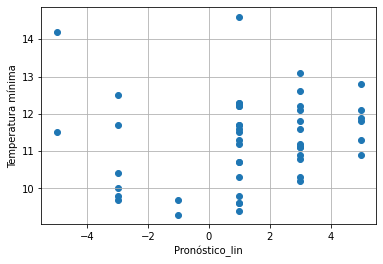

In [23]:
plt.scatter(df['Pronóstico_lin'],df['Temperatura mínima'])
plt.xlabel('Pronóstico_lin')
plt.ylabel('Temperatura mínima')
plt.grid()

In [24]:
Pronóstico_cuad

{'Soleado': -13.333333333333334,
 'Mayormente soleado': 2.666666666666666,
 'Parcialmente nublado': 10.666666666666666,
 'Nublado': 10.666666666666666,
 'Mayormente nublado': 2.666666666666666,
 'Lluvioso': -13.333333333333334}

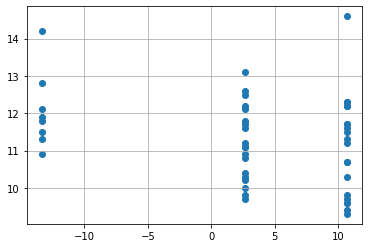

In [25]:
plt.scatter(df['Pronóstico_cuad'],df['Temperatura mínima'])
plt.grid()

In [26]:
lin=LinearRegression()
lin.fit(df[['Pronóstico_lin','Pronóstico_cuad']],df['Temperatura mínima'])

LinearRegression()

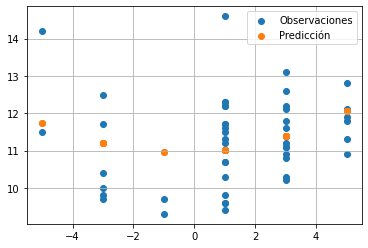

In [27]:
f=lin.predict(df[['Pronóstico_lin','Pronóstico_cuad']])
plt.scatter(df['Pronóstico_lin'],df['Temperatura mínima'],label='Observaciones')
plt.scatter(df['Pronóstico_lin'],f,label='Predicción')
plt.legend()
plt.grid()

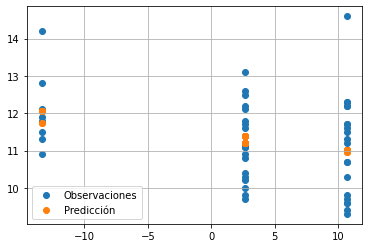

In [28]:
plt.scatter(df['Pronóstico_cuad'],df['Temperatura mínima'],label='Observaciones')
plt.scatter(df['Pronóstico_cuad'],f,label='Predicción')
plt.legend()
plt.grid()

### Creciente


escogiendo $$ X={0,1,2,3,...} $$

In [40]:
n=len(df['Días'].unique())
lim=n-1 if n%2==0 else (n-1)//2
step = 2 if n%2==0 else 1
x=range(-lim,lim+1,step)
x_list = list(x)
x_list = [x_list[i]+3 for i in range(len(x_list))]
x_list

[0, 1, 2, 3, 4, 5, 6]

In [41]:
catego=df['Días'].unique()
catego

array(['Sábado', 'Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves',
       'Viernes'], dtype=object)

In [42]:
Días_ord=np.concatenate([catego[2:],catego[:2]])
Días_ord

array(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado',
       'Domingo'], dtype=object)

In [45]:
a0=0
a1=5 #-0.1
Días_crec={categorías:a1*i+a0 for categorías,i in zip(Días_ord,x_list)}
Días_crec

{'Lunes': 0,
 'Martes': 5,
 'Miércoles': 10,
 'Jueves': 15,
 'Viernes': 20,
 'Sábado': 25,
 'Domingo': 30}

In [47]:
df['Días'].map(Días_crec)

0     25
1     30
2      0
3      5
4     10
5     15
6     20
7     25
8     30
9      0
10     5
11    10
12    15
13    20
14    25
15    30
16     0
17     5
18    10
19    15
20    20
21    25
22    30
23     0
24     5
25    10
26    15
27    20
28    25
29    30
30     0
31     5
32    10
33    15
34    20
35    25
36    30
37     0
38     5
39    10
40    15
41    20
42    25
43    30
44     0
45     5
46    10
47    15
Name: Días, dtype: int64

### Concava con a2 positivo

$$n*a0+sum(a1*x+a2*x**2)=0$$

In [48]:
a2=1
a1=0
a0=-a2/n*np.sum([i**2 for i in x])
Pronóstico_cuad_con={categorías:a0+a1*i+a2*i**2 for categorías,i in zip(Pronóstico_ord,x)}
Pronóstico_cuad_con

{'Soleado': 5.0,
 'Mayormente soleado': 0.0,
 'Parcialmente nublado': -3.0,
 'Nublado': -4.0,
 'Mayormente nublado': -3.0,
 'Lluvioso': 0.0}